In [278]:
import seaborn as sns
import scipy as pearsonr
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.dates as mdates
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import pandas as pd

In [135]:
pd.options.display.max_columns = None

#### Expenditure per Capita for PHC

In [136]:
phc = pd.read_excel('PHC per capita in usd.xlsx')
phc

,Countries,Indicators,Unnamed: 2,2019,2020,2021
0,NaN,NaN,NaN,Value,Value,Value
1,Botswana,Primary Health Care (PHC) Expenditure per Capi...,NaN,262.397605,NaN,NaN
2,Burkina Faso,Primary Health Care (PHC) Expenditure per Capi...,NaN,31.132356,40.026957,NaN
3,Burundi,Primary Health Care (PHC) Expenditure per Capi...,NaN,12.567859,NaN,NaN
4,Cabo Verde Republic of,Primary Health Care (PHC) Expenditure per Capi...,NaN,79.099014,NaN,NaN
...,...,...,...,...,...,...
97,China,Primary Health Care (PHC) Expenditure per Capi...,NaN,108.549661,NaN,NaN
98,Fiji,Primary Health Care (PHC) Expenditure per Capi...,NaN,144.330456,NaN,NaN
99,Lao People's Democratic Republic,Primary Health Care (PHC) Expenditure per Capi...,NaN,46.520688,NaN,NaN
100,Malaysia,Primary Health Care (PHC) Expenditure per Capi...,NaN,177.743965,183.738779,NaN


#### Current health Expenditures

In [137]:
pd.read_excel('Current_health_expenditure.xlsx')

,Countries,Indicators,Unnamed: 2,2019,2020,2021
0,NaN,NaN,NaN,Value,Value,Value
1,Algeria,Current Health Expenditure (CHE) as % Gross Do...,NaN,6.251709,6.32118,NaN
2,Angola,Current Health Expenditure (CHE) as % Gross Do...,NaN,2.655926,2.911835,NaN
3,Botswana,Current Health Expenditure (CHE) as % Gross Do...,NaN,6.121931,6.186646,NaN
4,Burkina Faso,Current Health Expenditure (CHE) as % Gross Do...,NaN,5.381213,NaN,6.719326
...,...,...,...,...,...,...
183,Solomon Islands,Current Health Expenditure (CHE) as % Gross Do...,NaN,4.462586,4.432182,NaN
184,Tonga,Current Health Expenditure (CHE) as % Gross Do...,NaN,4.7467,5.317539,NaN
185,Tuvalu,Current Health Expenditure (CHE) as % Gross Do...,NaN,20.889786,21.539169,NaN
186,Vanuatu,Current Health Expenditure (CHE) as % Gross Do...,NaN,3.314533,3.969954,NaN


### JHU Daten/ Inzidenzen

In [138]:
new_cases = pd.read_csv('new_cases.csv')
new_cases

,date,World,Afghanistan,Africa,Albania,Algeria,Andorra,Angola,Anguilla,Antigua and Barbuda,Argentina,Armenia,Aruba,Asia,Australia,Austria,Azerbaijan,Bahamas,Bahrain,Bangladesh,Barbados,Belarus,Belgium,Belize,Benin,Bermuda,Bhutan,Bolivia,Bonaire Sint Eustatius and Saba,Bosnia and Herzegovina,Botswana,Brazil,British Virgin Islands,Brunei,Bulgaria,Burkina Faso,Burundi,Cambodia,Cameroon,Canada,Cape Verde,Cayman Islands,Central African Republic,Chad,Chile,China,Colombia,Comoros,Congo,Cook Islands,Costa Rica,Cote d'Ivoire,Croatia,Cuba,Curacao,Cyprus,Czechia,Democratic Republic of Congo,Denmark,Djibouti,Dominica,Dominican Republic,Ecuador,Egypt,El Salvador,Equatorial Guinea,Eritrea,Estonia,Eswatini,Ethiopia,Europe,European Union,Faeroe Islands,Falkland Islands,Fiji,Finland,France,French Polynesia,Gabon,Gambia,Georgia,Germany,Ghana,Gibraltar,Greece,Greenland,Grenada,Guatemala,Guinea,Guinea-Bissau,Guyana,Haiti,High income,Honduras,Hong Kong,Hungary,Iceland,India,Indonesia,International,Iran,Iraq,Ireland,Isle of Man,Israel,Italy,Jamaica,Japan,Jordan,Kazakhstan,Kenya,Kiribati,Kosovo,Kuwait,Kyrgyzstan,Laos,Latvia,Lebanon,Lesotho,Liberia,Libya,Liechtenstein,Lithuania,Low income,Lower middle income,Luxembourg,Macao,Madagascar,Malawi,Malaysia,Maldives,Mali,Malta,Marshall Islands,Mauritania,Mauritius,Mexico,Micronesia (country),Moldova,Monaco,Mongolia,Montenegro,Montserrat,Morocco,Mozambique,Myanmar,Namibia,Nauru,Nepal,Netherlands,New Caledonia,New Zealand,Nicaragua,Niger,Nigeria,North America,North Korea,North Macedonia,Norway,Oceania,Oman,Pakistan,Palau,Palestine,Panama,Papua New Guinea,Paraguay,Peru,Philippines,Poland,Portugal,Qatar,Romania,Russia,Rwanda,Saint Helena,Saint Kitts and Nevis,Saint Lucia,Saint Pierre and Miquelon,Saint Vincent and the Grenadines,Samoa,San Marino,Sao Tome and Principe,Saudi Arabia,Senegal,Serbia,Seychelles,Sierra Leone,Singapore,Slovakia,Slovenia,Solomon Islands,Somalia,South Africa,South America,South Korea,South Sudan,Spain,Sri Lanka,Sudan,Suriname,Sweden,Switzerland,Syria,Taiwan,Tajikistan,Tanzania,Thailand,Timor,Togo,Tonga,Trinidad and Tobago,Tunisia,Turkey,Turks and Caicos Islands,Tuvalu,Uganda,Ukraine,United Arab Emirates,United Kingdom,United States,Upper middle income,Uruguay,Uzbekistan,Vanuatu,Vatican,Venezuela,Vietnam,Wallis and Futuna,Yemen,Zambia,Zimbabwe
0,2020-01-22,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2020-01-23,100.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,98.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,92.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Na

In [139]:
weekly_new_raw = pd.read_csv('weekly_cases_per_million.csv')
weekly_new_raw.iloc[1000::]

,date,World,Afghanistan,Africa,Albania,Algeria,Andorra,Angola,Anguilla,Antigua and Barbuda,Argentina,Armenia,Aruba,Asia,Australia,Austria,Azerbaijan,Bahamas,Bahrain,Bangladesh,Barbados,Belarus,Belgium,Belize,Benin,Bermuda,Bhutan,Bolivia,Bonaire Sint Eustatius and Saba,Bosnia and Herzegovina,Botswana,Brazil,British Virgin Islands,Brunei,Bulgaria,Burkina Faso,Burundi,Cambodia,Cameroon,Canada,Cape Verde,Cayman Islands,Central African Republic,Chad,Chile,China,Colombia,Comoros,Congo,Cook Islands,Costa Rica,Cote d'Ivoire,Croatia,Cuba,Curacao,Cyprus,Czechia,Democratic Republic of Congo,Denmark,Djibouti,Dominica,Dominican Republic,Ecuador,Egypt,El Salvador,Equatorial Guinea,Eritrea,Estonia,Eswatini,Ethiopia,Europe,European Union,Faeroe Islands,Falkland Islands,Fiji,Finland,France,French Polynesia,Gabon,Gambia,Georgia,Germany,Ghana,Gibraltar,Greece,Greenland,Grenada,Guatemala,Guinea,Guinea-Bissau,Guyana,Haiti,High income,Honduras,Hong Kong,Hungary,Iceland,India,Indonesia,International,Iran,Iraq,Ireland,Isle of Man,Israel,Italy,Jamaica,Japan,Jordan,Kazakhstan,Kenya,Kiribati,Kosovo,Kuwait,Kyrgyzstan,Laos,Latvia,Lebanon,Lesotho,Liberia,Libya,Liechtenstein,Lithuania,Low income,Lower middle income,Luxembourg,Macao,Madagascar,Malawi,Malaysia,Maldives,Mali,Malta,Marshall Islands,Mauritania,Mauritius,Mexico,Micronesia (country),Moldova,Monaco,Mongolia,Montenegro,Montserrat,Morocco,Mozambique,Myanmar,Namibia,Nauru,Nepal,Netherlands,New Caledonia,New Zealand,Nicaragua,Niger,Nigeria,North America,North Korea,North Macedonia,Norway,Oceania,Oman,Pakistan,Palau,Palestine,Panama,Papua New Guinea,Paraguay,Peru,Philippines,Poland,Portugal,Qatar,Romania,Russia,Rwanda,Saint Helena,Saint Kitts and Nevis,Saint Lucia,Saint Pierre and Miquelon,Saint Vincent and the Grenadines,Samoa,San Marino,Sao Tome and Principe,Saudi Arabia,Senegal,Serbia,Seychelles,Sierra Leone,Singapore,Slovakia,Slovenia,Solomon Islands,Somalia,South Africa,South America,South Korea,South Sudan,Spain,Sri Lanka,Sudan,Suriname,Sweden,Switzerland,Syria,Taiwan,Tajikistan,Tanzania,Thailand,Timor,Togo,Tonga,Trinidad and Tobago,Tunisia,Turkey,Turks and Caicos Islands,Tuvalu,Uganda,Ukraine,United Arab Emirates,United Kingdom,United States,Upper middle income,Uruguay,Uzbekistan,Vanuatu,Vatican,Venezuela,Vietnam,Wallis and Futuna,Yemen,Zambia,Zimbabwe
1000,2022-10-18,402.087,21.323,4.202,48.904,1.114,1139.737,0.0,0.0,85.313,41.09,139.185,0.000,196.451,1247.946,9230.149,39.390,39.025,1418.250,15.007,1540.941,0.0,1614.544,41.946,0.0,934.478,61.345,22.006,1072.009,98.035,0.0,69.308,0.0,6122.467,717.345,0.000,6.439,2.266,0.0,629.396,11.801,0.000,34.772,0.451,1424.626,5.148,9.080,9.560,0.0,0.000,592.182,5.220,892.724,1.962,83.694,3079.217,1604.537,0.384,1504.014,0.0,0.0,88.700,47.331,0.0,0.0,42.390,0.543,806.899,0.000,0.770,2528.139,3584.113,0.0,0.0,3.227,1952.986,5682.023,9.795,15.906,0.0,0.000,7649.301,6.512,795.667,5343.009,0.0,382.595,232.404,3.536,0.0,25.967,0.691,2295.888,21.279,4916.501,1267.745,458.564,12.801,43.720,NaN,24.822,0.0,448.527,0.0,456.768,4668.696,0.000,2019.061,0.0,14.125,2.388,0.000,14.028,156.481,12.668,11.820,2724.983,14.573,0.0,0.566,2.055,5666.370,1549.422,2.115,47.640,4408.579,0.000,0.000,0.539,376.184,131.730,0.620,303.773,336.595,42.862,464.032,37.756,1243.672,18.026,1205.777,97.400,931.298,0.0,4.004,0.0,44.187,NaN,0.0,9.395,1293.155,106.912,2755.873,4.030,0.000,0.554,483.632,0.0,158.100,91.640,1108.643,0.00,0.000,497.678,0.0,164.452,11.634,32.592,57.710,126.109,262.262,367.058,1560.592,204.840,626.604,0.508,7406.036,20.973,0.000,0.000,19.238,0.000,6797.269,48.374,35.431,4.966,1418.458,0.0,0.0,10563.556,797.915,5686.270,0.0,0.000,39.787,114.286,3250.514,0.0,434.243,2.657,2.240,43.686,351.965,0.000,0.542,13082.025,0.0,2.534,31.159,11.929,4.746,0.000,285.426,9.226,0.0,0.0,0.0,0.000,2592.304,207.390,940.912,742.071,66.453,281.641,2.426,0.00,0.0,14.522,53.052,228872.025,0.0,0.999,8.823
1001,2022-10-19,399.294,20.132,4.123,51.367,1.024,1039.540,0.0,0.0,0.000,41.09,139.185,NaN,

In [140]:
weekly_new_raw['date'] = pd.to_datetime(weekly_new_raw['date'])

In [141]:
month = weekly_new_raw.groupby(by=[pd.Grouper(key='date', freq='M')]).mean()
month

,World,Afghanistan,Africa,Albania,Algeria,Andorra,Angola,Anguilla,Antigua and Barbuda,Argentina,Armenia,Aruba,Asia,Australia,Austria,Azerbaijan,Bahamas,Bahrain,Bangladesh,Barbados,Belarus,Belgium,Belize,Benin,Bermuda,Bhutan,Bolivia,Bonaire Sint Eustatius and Saba,Bosnia and Herzegovina,Botswana,Brazil,British Virgin Islands,Brunei,Bulgaria,Burkina Faso,Burundi,Cambodia,Cameroon,Canada,Cape Verde,Cayman Islands,Central African Republic,Chad,Chile,China,Colombia,Comoros,Congo,Cook Islands,Costa Rica,Cote d'Ivoire,Croatia,Cuba,Curacao,Cyprus,Czechia,Democratic Republic of Congo,Denmark,Djibouti,Dominica,Dominican Republic,Ecuador,Egypt,El Salvador,Equatorial Guinea,Eritrea,Estonia,Eswatini,Ethiopia,Europe,European Union,Faeroe Islands,Falkland Islands,Fiji,Finland,France,French Polynesia,Gabon,Gambia,Georgia,Germany,Ghana,Gibraltar,Greece,Greenland,Grenada,Guatemala,Guinea,Guinea-Bissau,Guyana,Haiti,High income,Honduras,Hong Kong,Hungary,Iceland,India,Indonesia,International,Iran,Iraq,Ireland,Isle of Man,Israel,Italy,Jamaica,Japan,Jordan,Kazakhstan,Kenya,Kiribati,Kosovo,Kuwait,Kyrgyzstan,Laos,Latvia,Lebanon,Lesotho,Liberia,Libya,Liechtenstein,Lithuania,Low income,Lower middle income,Luxembourg,Macao,Madagascar,Malawi,Malaysia,Maldives,Mali,Malta,Marshall Islands,Mauritania,Mauritius,Mexico,Micronesia (country),Moldova,Monaco,Mongolia,Montenegro,Montserrat,Morocco,Mozambique,Myanmar,Namibia,Nauru,Nepal,Netherlands,New Caledonia,New Zealand,Nicaragua,Niger,Nigeria,North America,North Korea,North Macedonia,Norway,Oceania,Oman,Pakistan,Palau,Palestine,Panama,Papua New Guinea,Paraguay,Peru,Philippines,Poland,Portugal,Qatar,Romania,Russia,Rwanda,Saint Helena,Saint Kitts and Nevis,Saint Lucia,Saint Pierre and Miquelon,Saint Vincent and the Grenadines,Samoa,San Marino,Sao Tome and Principe,Saudi Arabia,Senegal,Serbia,Seychelles,Sierra Leone,Singapore,Slovakia,Slovenia,Solomon Islands,Somalia,South Africa,South America,South Korea,South Sudan,Spain,Sri Lanka,Sudan,Suriname,Sweden,Switzerland,Syria,Taiwan,Tajikistan,Tanzania,Thailand,Timor,Togo,Tonga,Trinidad and Tobago,Tunisia,Turkey,Turks and Caicos Islands,Tuvalu,Uganda,Ukraine,United Arab Emirates,United Kingdom,United States,Upper middle income,Uruguay,Uzbekistan,Vanuatu,Vatican,Venezuela,Vietnam,Wallis and Futuna,Yemen,Zambia,Zimbabwe
date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2020-01-31,0.741400,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.247400,0.344000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.071500,NaN,NaN,NaN,NaN,NaN,4.702500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.014250,0.021500,NaN,NaN,NaN,NaN,0.064000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.052400,NaN,1.201500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.064500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.001000,NaN,7.911500,NaN,NaN,0.236000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.033000,NaN,NaN,NaN,NaN,NaN,NaN,0.012800,NaN,NaN,NaN,0.200000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.463750,NaN,NaN,NaN,NaN,NaN,NaN,0.087000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.303500,NaN,NaN,0.153000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.015000,2.313400,NaN,NaN,NaN,NaN,NaN,0.010000,NaN,NaN,NaN,NaN
2020-02-29,2.321241,0.122000,0.000667,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.847138,0.101414,NaN,NaN,NaN,27.849000,NaN,NaN,NaN,0.008190,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.004138,NaN,0.114759,NaN,NaN,NaN,NaN,0.102000,12.347862,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.001636,NaN,NaN,NaN,NaN,NaN,NaN,0.225862,0.345241,NaN,NaN,NaN,0.166889,0.

In [142]:
inz = month.unstack(level=0)
inzidenz = pd.DataFrame(inz)
inzidenz.reset_index(inplace=True)
inzidenz.rename(columns={'level_0':'Entity', 0:'inzidenz'}, inplace=True)
inzidenz

,Entity,date,inzidenz
0,World,2020-01-31,0.741400
1,World,2020-02-29,2.321241
2,World,2020-03-31,16.555290
3,World,2020-04-30,70.652200
4,World,2020-05-31,79.024323
...,...,...,...
8542,Zimbabwe,2022-09-30,9.768833
8543,Zimbabwe,2022-10-31,7.099677
8544,Zimbabwe,2022-11-30,2.595900
8545,Zimbabwe,2022-12-31,26.376645


#### Bevölkerungszahlen

In [143]:
einwohner = pd.read_csv('locations.csv')
einwohner

,Country/Region,location,continent,population_year,population
0,Afghanistan,Afghanistan,Asia,2022.0,41128772.0
1,Albania,Albania,Europe,2022.0,2842318.0
2,Algeria,Algeria,Africa,2022.0,44903228.0
3,Andorra,Andorra,Europe,2022.0,79843.0
4,Angola,Angola,Africa,2022.0,35588996.0
...,...,...,...,...,...
214,Vietnam,Vietnam,Asia,2022.0,98186856.0
215,Wallis and Futuna,Wallis and Futuna,Oceania,2022.0,11596.0
216,Yemen,Yemen,Asia,2022.0,33696612.0
217,Zambia,Zambia,Africa,2022.0,20017670.0


#### Gdp Daten vorbereiten

In [144]:
# Quelle https://data.worldbank.org/indicator/NY.GDP.PCAP.CD?view=chart
gdp_raw = pd.read_csv('API_NY/API_NY.GDP.PCAP.CD_DS2_en_csv_v2_4770417.csv', delimiter= ',')

FileNotFoundError: [Errno 2] No such file or directory: 'API_NY/API_NY.GDP.PCAP.CD_DS2_en_csv_v2_4770417.csv'

In [ ]:
# GDP per Capita für 2020,2021
gdp_20_21 = gdp_raw[['Country Name', 'Country Code','2020','2021']]
gdp_20_21

NameError: name 'gdp_raw' is not defined

In [ ]:
# Null Values bereinigen
# gdp[gdp.gdp.isnull()]
gdp_20_21=gdp_20_21.dropna(axis=0, how='any')
gdp_20_21


NameError: name 'gdp_20_21' is not defined

Kosten für die primäre Gesunheitsversorgung per capita USD


In [ ]:
phc_expenditure=pd.read_excel('PHC per capita in usd.xlsx')
phc_expenditure

NameError: name 'pd' is not defined

### Übersterblichkeit Data-Set

In [145]:
# Data Quelle https://github.com/owid/covid-19-data/tree/master/public/data/excess_mortality
mort_raw = pd.read_csv('excess_mortality.csv')
mort_raw

,location,date,p_scores_all_ages,p_scores_15_64,p_scores_65_74,p_scores_75_84,p_scores_85plus,deaths_2020_all_ages,average_deaths_2015_2019_all_ages,deaths_2015_all_ages,deaths_2016_all_ages,deaths_2017_all_ages,deaths_2018_all_ages,deaths_2019_all_ages,deaths_2010_all_ages,deaths_2011_all_ages,deaths_2012_all_ages,deaths_2013_all_ages,deaths_2014_all_ages,deaths_2021_all_ages,time,time_unit,p_scores_0_14,projected_deaths_2020_2022_all_ages,excess_proj_all_ages,cum_excess_proj_all_ages,cum_proj_deaths_all_ages,cum_p_proj_all_ages,p_proj_all_ages,p_proj_0_14,p_proj_15_64,p_proj_65_74,p_proj_75_84,p_proj_85p,cum_excess_per_million_proj_all_ages,excess_per_million_proj_all_ages,deaths_2022_all_ages,deaths_2020_2022_all_ages
0,Albania,2020-01-31,-10.65,NaN,NaN,NaN,NaN,2187.0,2447.8,2490.0,2065.0,3129.0,2158.0,2397.0,NaN,NaN,NaN,NaN,NaN,3002.0,1,monthly,NaN,2434.2,-247.2,-247.2,2434.2,-10.16,-10.16,NaN,NaN,NaN,NaN,NaN,-86.971268,-86.971268,3294.0,2187.0
1,Albania,2020-02-29,2.17,NaN,NaN,NaN,NaN,2018.0,1975.2,2139.0,1905.0,1845.0,2013.0,1974.0,NaN,NaN,NaN,NaN,NaN,3773.0,2,monthly,NaN,1961.6,56.4,-190.8,4395.8,-4.34,2.88,NaN,NaN,NaN,NaN,NaN,-67.128309,19.842959,2752.0,2018.0
2,Albania,2020-03-31,0.62,NaN,NaN,NaN,NaN,1993.0,1980.8,2051.0,1910.0,1817.0,2136.0,1990.0,NaN,NaN,NaN,NaN,NaN,3447.0,3,monthly,NaN,1967.2,25.8,-165.0,6363.0,-2.59,1.31,NaN,NaN,NaN,NaN,NaN,-58.051210,9.077098,1892.0,1993.0
3,Albania,2020-04-30,3.23,NaN,NaN,NaN,NaN,1804.0,1747.6,1906.0,1652.0,1665.0,1828.0,1687.0,NaN,NaN,NaN,NaN,NaN,2419.0,4,monthly,NaN,1734.0,70.0,-95.0,8097.0,-1.17,4.04,NaN,NaN,NaN,NaN,NaN,-33.423424,24.627786,1707.0,1804.0
4,Albania,2020-05-31,6.15,NaN,NaN,NaN,NaN,1803.0,1698.6,1709.0,1716.0,1660.0,1664.0,1744.0,NaN,NaN,NaN,NaN,NaN,1874.0,5,monthly,NaN,1685.0,118.0,23.0,9782.0,0.24,7.00,NaN,NaN,NaN,NaN,NaN,8.091987,41.515411,1675.0,1803.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10742,Uzbekistan,2022-07-31,25.76,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7,monthly,NaN,13948.1,3320.9,43509.5,404773.5,10.75,23.81,NaN,NaN,NaN,NaN,NaN,1256.495965,95.903135,NaN,17269.0
10743,Uzbekistan,2022-08-31,53.20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8,monthly,NaN,12469.1,6301.9,49811.4,417242.6,11.94,50.54,NaN,NaN,NaN,NaN,NaN,1438.486379,181.990414,NaN,18771.0
10744,Uzbekistan,2022-09-30,24.24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9,monthly,NaN,11073.5,2415.5,52226.9,428316.1,12.19,21.81,NaN,NaN,NaN,NaN,NaN,1508.242778,69.756398,NaN,13489.0
10745,Uzbekistan,2022-10-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10,monthly,NaN,12134.1,NaN,NaN,440450.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### Aufbereitung der Daten für weiteren Analysen

In [146]:
mort_raw.date = pd.to_datetime(mort_raw.date)

In [147]:
mort_selected = mort_raw[['location', 'date', 'average_deaths_2015_2019_all_ages', 'deaths_2020_all_ages', 'deaths_2021_all_ages', 'deaths_2022_all_ages']]
mort_selected.dtypes

location                                     object
date                                 datetime64[ns]
average_deaths_2015_2019_all_ages           float64
deaths_2020_all_ages                        float64
deaths_2021_all_ages                        float64
deaths_2022_all_ages                        float64
dtype: object

In [148]:
mort_selected['month'] = mort_selected['date'].dt.month
mort_selected['year'] = mort_selected['date'].dt.year

C:\Users\kevin\AppData\Local\Temp\ipykernel_4432\2211750168.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mort_selected['month'] = mort_selected['date'].dt.month
C:\Users\kevin\AppData\Local\Temp\ipykernel_4432\2211750168.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mort_selected['year'] = mort_selected['date'].dt.year


In [149]:
# Gruppierung nach 'month' und 'year' und 'land'
grouped = mort_selected.groupby(['month', 'year', 'location'])[['average_deaths_2015_2019_all_ages','deaths_2020_all_ages','deaths_2021_all_ages','deaths_2022_all_ages']].sum().reset_index()

In [150]:
# Umwandeln der Series in einen Dataframe
grouped.rename(columns= {'average_deaths_2015_2019_all_ages':'2015_2019', 'deaths_2020_all_ages':'2020', 'deaths_2021_all_ages':'2021', 'deaths_2022_all_ages':'2022'}, inplace = True)

In [151]:
mort_zw = grouped.drop(index= grouped[(grouped['year']==2021)|(grouped['year']==2022)].index)
mort_fin = mort_zw.melt(id_vars=['location', 'month'], value_vars=['2015_2019', '2020', '2021', '2022'], var_name='year', value_name='gestorben')

In [152]:
vergliechswerte = mort_fin[mort_fin['year']=='2015_2019']

In [153]:
mort_fin.drop(index=mort_fin[mort_fin['year']=='2015_2019'].index, inplace=True)
mort_fin

,location,month,year,gestorben
1500,Albania,1,2020,2187.0
1501,Algeria,1,2020,17195.0
1502,Andorra,1,2020,34.0
1503,Antigua and Barbuda,1,2020,50.0
1504,Argentina,1,2020,25791.0
...,...,...,...,...
5995,Ukraine,12,2022,0.0
5996,United Kingdom,12,2022,0.0
5997,United States,12,2022,0.0
5998,Uruguay,12,2022,0.0


In [154]:
mort_fin[mort_fin['location']=='Germany']

,location,month,year,gestorben
1543,Germany,1,2020,76071.0
1668,Germany,2,2020,77413.0
1793,Germany,3,2020,98421.0
1918,Germany,4,2020,78982.0
2043,Germany,5,2020,86511.0
2168,Germany,6,2020,67557.0
2293,Germany,7,2020,66023.0
2418,Germany,8,2020,88838.0
2543,Germany,9,2020,68945.0
2668,Germany,10,2020,71457.0


In [155]:
mort_fin.year = pd.to_numeric(mort_fin.year)
mort_fin.dtypes

location      object
month          int64
year           int64
gestorben    float64
dtype: object

### Die Übersterblichkeiten mit Inzidenzen joinen

In [156]:
inzidenz['month']  = inzidenz.date.dt.month
inzidenz['year'] = inzidenz.date.dt.year
inzidenz.dtypes

Entity              object
date        datetime64[ns]
inzidenz           float64
month                int64
year                 int64
dtype: object

In [157]:
mort_inz = pd.merge(left=mort_fin, right=inzidenz, left_on=['location', 'month', 'year'], right_on=['Entity', 'month', 'year'], how='left')
mort_inz

,location,month,year,gestorben,Entity,date,inzidenz
0,Albania,1,2020,2187.0,Albania,2020-01-31,NaN
1,Algeria,1,2020,17195.0,Algeria,2020-01-31,NaN
2,Andorra,1,2020,34.0,Andorra,2020-01-31,NaN
3,Antigua and Barbuda,1,2020,50.0,Antigua and Barbuda,2020-01-31,NaN
4,Argentina,1,2020,25791.0,Argentina,2020-01-31,NaN
...,...,...,...,...,...,...,...
4495,Ukraine,12,2022,0.0,Ukraine,2022-12-31,114.165774
4496,United Kingdom,12,2022,0.0,United Kingdom,2022-12-31,457.948581
4497,United States,12,2022,0.0,United States,2022-12-31,1305.961226
4498,Uruguay,12,2022,0.0,Uruguay,2022-12-31,1147.364323


In [158]:
# Standardisierung der inzidenz 
mort_inz['inzidenz'] = mort_inz['inzidenz']/10
mort_inz

,location,month,year,gestorben,Entity,date,inzidenz
0,Albania,1,2020,2187.0,Albania,2020-01-31,NaN
1,Algeria,1,2020,17195.0,Algeria,2020-01-31,NaN
2,Andorra,1,2020,34.0,Andorra,2020-01-31,NaN
3,Antigua and Barbuda,1,2020,50.0,Antigua and Barbuda,2020-01-31,NaN
4,Argentina,1,2020,25791.0,Argentina,2020-01-31,NaN
...,...,...,...,...,...,...,...
4495,Ukraine,12,2022,0.0,Ukraine,2022-12-31,11.416577
4496,United Kingdom,12,2022,0.0,United Kingdom,2022-12-31,45.794858
4497,United States,12,2022,0.0,United States,2022-12-31,130.596123
4498,Uruguay,12,2022,0.0,Uruguay,2022-12-31,114.736432


In [159]:
mort_inz.drop(columns=['Entity'], inplace=True)

In [160]:
mort_inz[(mort_inz['Entity'].notnull())&(mort_inz['location']=='Argentina')]

KeyError: 'Entity'

In [ ]:
# Welche Länder sind nicht vorhanden
mort_location = pd.DataFrame(mort_fin['location'].unique()).rename(columns={0:'land'}).add_suffix('_right')

inz_location = pd.DataFrame(inzidenz['Entity'].unique()).rename(columns={0:'land'}).add_suffix('_left')

location_check_inzidenz = pd.merge(right=mort_location, left=inz_location, how='left', left_on='land_left', right_on='land_right')
location_check_inzidenz

,land_left,land_right
0,World,NaN
1,Afghanistan,NaN
2,Africa,NaN
3,Albania,Albania
4,Algeria,Algeria
...,...,...
226,Vietnam,NaN
227,Wallis and Futuna,NaN
228,Yemen,NaN
229,Zambia,NaN


In [ ]:
l = location_check_inzidenz[location_check_inzidenz['land_right'].isnull()]
l.apply(lambda row: print(row['land_left']), axis=1)

World
Afghanistan
Africa
Angola
Anguilla
Asia
Bahrain
Bangladesh
Benin
Bhutan
Bonaire Sint Eustatius and Saba
Botswana
British Virgin Islands
Burkina Faso
Burundi
Cambodia
Cameroon
Cayman Islands
Central African Republic
Chad
China
Comoros
Congo
Cook Islands
Cote d'Ivoire
Curacao
Democratic Republic of Congo
Djibouti
Dominica
Equatorial Guinea
Eritrea
Eswatini
Ethiopia
Europe
European Union
Falkland Islands
Fiji
Gabon
Gambia
Ghana
Grenada
Guinea
Guinea-Bissau
Guyana
Haiti
High income
Honduras
India
Indonesia
International
Iraq
Isle of Man
Kenya
Kiribati
Laos
Lesotho
Liberia
Libya
Low income
Lower middle income
Madagascar
Malawi
Mali
Marshall Islands
Mauritania
Micronesia (country)
Montserrat
Morocco
Mozambique
Myanmar
Namibia
Nauru
Nepal
Niger
Nigeria
North America
North Korea
Oceania
Pakistan
Palau
Papua New Guinea
Rwanda
Saint Helena
Saint Lucia
Saint Pierre and Miquelon
Samoa
Sao Tome and Principe
Saudi Arabia
Senegal
Sierra Leone
Solomon Islands
Somalia
South America
South Sudan
Sr

0      None
1      None
2      None
6      None
7      None
       ... 
226    None
227    None
228    None
229    None
230    None
Length: 116, dtype: object

In [ ]:
mort_location = pd.DataFrame(mort_fin['location'].unique()).rename(columns={0:'land'}).add_suffix('_mort')

inz_location = pd.DataFrame(inzidenz['Entity'].unique()).rename(columns={0:'land'}).add_suffix('_inz')

location_check_mort = pd.merge(left=mort_location, right=inz_location, how='left', left_on='land_mort', right_on='land_inz')
location_check_mort[location_check_mort['land_inz'].isnull()]

,land_mort,land_inz
35,England & Wales,NaN
40,French Guiana,NaN
47,Guadeloupe,NaN
72,Martinique,NaN
74,Mayotte,NaN
85,Northern Ireland,NaN
95,Puerto Rico,NaN
97,Reunion,NaN
103,Scotland,NaN
118,Transnistria,NaN


#### Maßnahmen

In [ ]:
mass = pd.read_csv('government_response')
mass.Entity.unique()

array(['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola',
       'Argentina', 'Aruba', 'Australia', 'Austria', 'Azerbaijan',
       'Bahamas', 'Bahrain', 'Bangladesh', 'Barbados', 'Belarus',
       'Belgium', 'Belize', 'Benin', 'Bermuda', 'Bhutan', 'Bolivia',
       'Bosnia and Herzegovina', 'Botswana', 'Brazil', 'Brunei',
       'Bulgaria', 'Burkina Faso', 'Burundi', 'Cambodia', 'Cameroon',
       'Canada', 'Cape Verde', 'Central African Republic', 'Chad',
       'Chile', 'China', 'Colombia', 'Comoros', 'Congo', 'Costa Rica',
       "Cote d'Ivoire", 'Croatia', 'Cuba', 'Cyprus', 'Czechia',
       'Democratic Republic of Congo', 'Denmark', 'Djibouti', 'Dominica',
       'Dominican Republic', 'Ecuador', 'Egypt', 'El Salvador', 'Eritrea',
       'Estonia', 'Eswatini', 'Ethiopia', 'Faeroe Islands', 'Fiji',
       'Finland', 'France', 'Gabon', 'Gambia', 'Georgia', 'Germany',
       'Ghana', 'Greece', 'Greenland', 'Guam', 'Guatemala', 'Guinea',
       'Guyana', 'Haiti', 'Honduras', 'H

### Vaccination

In [ ]:
vax = pd.read_csv('vaccinations.csv')

In [ ]:
vax

,location,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,total_boosters,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,total_boosters_per_hundred,daily_vaccinations_per_million,daily_people_vaccinated,daily_people_vaccinated_per_hundred
0,Afghanistan,AFG,2021-02-22,0.0,0.0,NaN,NaN,NaN,NaN,0.00,0.00,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,AFG,2021-02-23,NaN,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,NaN,33.0,1367.0,0.003
2,Afghanistan,AFG,2021-02-24,NaN,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,NaN,33.0,1367.0,0.003
3,Afghanistan,AFG,2021-02-25,NaN,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,NaN,33.0,1367.0,0.003
4,Afghanistan,AFG,2021-02-26,NaN,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,NaN,33.0,1367.0,0.003
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
148100,Zimbabwe,ZWE,2022-10-05,12219760.0,6436704.0,4750104.0,1032952.0,NaN,2076.0,74.87,39.44,29.11,6.33,127.0,638.0,0.004
148101,Zimbabwe,ZWE,2022-10-06,NaN,NaN,NaN,NaN,NaN,1714.0,NaN,NaN,NaN,NaN,105.0,563.0,0.003
148102,Zimbabwe,ZWE,2022-10-07,NaN,NaN,NaN,NaN,NaN,1529.0,NaN,NaN,NaN,NaN,94.0,462.0,0.003
148103,Zimbabwe,ZWE,2022-10-08,NaN,NaN,NaN,NaN,NaN,1344.0,NaN,NaN,NaN,NaN,82.0,361.0,0.002


In [ ]:
vax.date = pd.to_datetime(vax.date)

In [ ]:
vax.fillna(0)

,location,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,total_boosters,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,total_boosters_per_hundred,daily_vaccinations_per_million,daily_people_vaccinated,daily_people_vaccinated_per_hundred
0,Afghanistan,AFG,2021-02-22,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.0,0.0,0.000
1,Afghanistan,AFG,2021-02-23,0.0,0.0,0.0,0.0,0.0,1367.0,0.00,0.00,0.00,0.00,33.0,1367.0,0.003
2,Afghanistan,AFG,2021-02-24,0.0,0.0,0.0,0.0,0.0,1367.0,0.00,0.00,0.00,0.00,33.0,1367.0,0.003
3,Afghanistan,AFG,2021-02-25,0.0,0.0,0.0,0.0,0.0,1367.0,0.00,0.00,0.00,0.00,33.0,1367.0,0.003
4,Afghanistan,AFG,2021-02-26,0.0,0.0,0.0,0.0,0.0,1367.0,0.00,0.00,0.00,0.00,33.0,1367.0,0.003
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
148100,Zimbabwe,ZWE,2022-10-05,12219760.0,6436704.0,4750104.0,1032952.0,0.0,2076.0,74.87,39.44,29.11,6.33,127.0,638.0,0.004
148101,Zimbabwe,ZWE,2022-10-06,0.0,0.0,0.0,0.0,0.0,1714.0,0.00,0.00,0.00,0.00,105.0,563.0,0.003
148102,Zimbabwe,ZWE,2022-10-07,0.0,0.0,0.0,0.0,0.0,1529.0,0.00,0.00,0.00,0.00,94.0,462.0,0.003
148103,Zimbabwe,ZWE,2022-10-08,0.0,0.0,0.0,0.0,0.0,1344.0,0.00,0.00,0.00,0.00,82.0,361.0,0.002


In [ ]:
vax_test = vax.fillna(0).describe()
vax_test

,total_vaccinations,people_vaccinated,people_fully_vaccinated,total_boosters,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,total_boosters_per_hundred,daily_vaccinations_per_million,daily_people_vaccinated,daily_people_vaccinated_per_hundred
count,1.481050e+05,1.481050e+05,1.481050e+05,1.481050e+05,1.481050e+05,1.481050e+05,148105.000000,148105.000000,148105.000000,148105.000000,148105.000000,1.481050e+05,148105.000000
mean,1.490858e+08,6.432561e+07,5.430757e+07,1.862499e+07,3.457203e+05,3.624715e+05,50.996413,22.114417,19.037748,7.599095,2340.116883,1.343695e+05,0.095203
std,8.805585e+08,3.896594e+08,3.440417e+08,1.423417e+08,2.232320e+06,2.196792e+06,77.690991,31.633021,29.215703,18.981950,3408.820381,8.937792e+05,0.195938
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000
25%,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.960000e+02,0.000000,0.000000,0.000000,0.000000,260.000000,9.700000e+01,0.005000
50%,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,5.600000e+03,0.000000,0.000000,0.000000,0.000000,1078.000000,1.437000e+03,0.027000
75%,7.995825e+06,3.844371e+06,2.496426e+06,5.300000e+01,1.035600e+04,4.239500e+04,96.440000,49.880000,38.580000,0.000000,3171.000000,1.418600e+04,0.107000
max,1.317537e+10,5.511964e+09,5.058453e+09,2.681355e+09,4.967793e+07,4.369086e+07,406.430000,129.070000,126.890000,150.470000,117113.000000,2.107135e+07,11.711000


In [ ]:
vax['year'] = vax['date'].dt.year
vax['month'] = vax['date'].dt.month
vax['week_of_year'] = vax['date'].dt.weekofyear

C:\Users\kevin\AppData\Local\Temp\ipykernel_4432\1164759379.py:3: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.
  vax['week_of_year'] = vax['date'].dt.weekofyear


In [248]:
vax_monat = vax.fillna(0).groupby(by=[vax['location'],vax['year'],vax['month']])['people_vaccinated','people_fully_vaccinated','total_boosters','people_vaccinated_per_hundred','people_fully_vaccinated_per_hundred','total_boosters_per_hundred'].sum()

C:\Users\kevin\AppData\Local\Temp\ipykernel_4432\1623093032.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  vax_monat = vax.fillna(0).groupby(by=[vax['location'],vax['year'],vax['month']])['people_vaccinated','people_fully_vaccinated','total_boosters','people_vaccinated_per_hundred','people_fully_vaccinated_per_hundred','total_boosters_per_hundred'].sum()


In [249]:
vax_monat

people_vaccinated  people_fully_vaccinated  \
location    year month                                               
Afghanistan 2021 2                 8200.0                      0.0   
                 3                54000.0                      0.0   
                 4               360000.0                      0.0   
                 5              2834758.0                 574841.0   
                 6              3861941.0                1186390.0   
...                                   ...                      ...   
Zimbabwe    2022 6            156852808.0              114168942.0   
                 7            165009462.0              121099327.0   
                 8            134218032.0               98854685.0   
                 9             51400663.0               37909453.0   
                 10            32180971.0               23745809.0   

                        total_boosters  people_vaccinated_per_hundred  \
location    year month                                                  
Afghanistan 2021 2                 0.0                           0.02   
                 3                 0.0                           0.13   
                 4                 0.0                           0.87   
                 5                 0.0                           6.90   
                 6                 0.0                           9.39   
...                                ...                            ...   
Zimbabwe    2022 6          21735350.0                         961.09   
                 7          24162841.0                        1011.05   
                 8          20451729.0                         822.38   
                 9           8173922.0                         314.95   
                 10          5160046.0                         197.18   

                        people_fully_vaccinated_per_hundred  \
location    year month                                        
Afghanistan 2021 2                                     0.00   
                 3                                     0.00   
                 4                                     0.00   
                 5                                     1.41   
                 6                                     2.88   
...                                                     ...   
Zimbabwe    2022 6                                   699.54   
                 7                                   741.99   
                 8                                   605.70   
                 9                                   232.27   
                 10                                  145.50   

                        total_boosters_per_hundred  
location    year month                              
Afghanistan 2021 2                            0.00  
                 3                            0.00  
                 4                            0.00  
                 5                            0.00  
                 6                            0.00  
...                                            ...  
Zimbabwe    2022 6                          133.20  
                 7                          148.06  
                 8                          125.30  
                 9                           50.09  
                 10                          31.61  

[5101 rows x 6 columns]

In [250]:
vax_monat_reset = vax_monat.unstack(level=[1,0])

In [260]:
vax_monat_reset = vax_monat.reset_index(level=[0,2], col_level=['location', 'year', 'month'])
vax_monat_reset

,location,month,people_vaccinated,people_fully_vaccinated,total_boosters,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,total_boosters_per_hundred
year,,,,,,,,
2021,Afghanistan,2,8200.0,0.0,0.0,0.02,0.00,0.00
2021,Afghanistan,3,54000.0,0.0,0.0,0.13,0.00,0.00
2021,Afghanistan,4,360000.0,0.0,0.0,0.87,0.00,0.00
2021,Afghanistan,5,2834758.0,574841.0,0.0,6.90,1.41,0.00
2021,Afghanistan,6,3861941.0,1186390.0,0.0,9.39,2.88,0.00
...,...,...,...,...,...,...,...,...
2022,Zimbabwe,6,156852808.0,114168942.0,21735350.0,961.09,699.54,133.20
2022,Zimbabwe,7,165009462.0,121099327.0,24162841.0,1011.05,741.99,148.06
2022,Zimbabwe,8,134218032.0,98854685.0,20451729.0,822.38,605.70,125.30


In [ ]:
vax_week = vax.fillna(0).groupby(by=[vax['location'],vax['date'].dt.year,vax['date'].dt.weekofyear])['people_vaccinated','people_fully_vaccinated','total_boosters','people_vaccinated_per_hundred','people_fully_vaccinated_per_hundred','total_boosters_per_hundred'].sum()

C:\Users\kevin\AppData\Local\Temp\ipykernel_4432\4052811161.py:1: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.
  vax_week = vax.fillna(0).groupby(by=[vax['location'],vax['date'].dt.year,vax['date'].dt.weekofyear])['people_vaccinated','people_fully_vaccinated','total_boosters','people_vaccinated_per_hundred','people_fully_vaccinated_per_hundred','total_boosters_per_hundred'].sum()
C:\Users\kevin\AppData\Local\Temp\ipykernel_4432\4052811161.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  vax_week = vax.fillna(0).groupby(by=[vax['location'],vax['date'].dt.year,vax['date'].dt.weekofyear])['people_vaccinated','people_fully_vaccinated','total_boosters','people_vaccinated_per_hundred','people_fully_vaccinated_per_hundred','total_boosters_per_hundred'].sum()


In [ ]:
vax_week

people_vaccinated  people_fully_vaccinated  \
location    date date                                               
Afghanistan 2021 8                8200.0                      0.0   
                 9                   0.0                      0.0   
                 10                  0.0                      0.0   
                 11              54000.0                      0.0   
                 12                  0.0                      0.0   
...                                  ...                      ...   
Zimbabwe    2022 37                  0.0                      0.0   
                 38           25693521.0               18947546.0   
                 39           32161017.0               23726899.0   
                 40           19310482.0               14250314.0   
                 52            8263368.0                6284359.0   

                       total_boosters  people_vaccinated_per_hundred  \
location    date date                                                  
Afghanistan 2021 8                0.0                           0.02   
                 9                0.0                           0.00   
                 10               0.0                           0.00   
                 11               0.0                           0.13   
                 12               0.0                           0.00   
...                               ...                            ...   
Zimbabwe    2022 37               0.0                           0.00   
                 38         4080512.0                         157.43   
                 39         5140409.0                         197.06   
                 40         3098566.0                         118.32   
                 52           17298.0                          50.63   

                       people_fully_vaccinated_per_hundred  \
location    date date                                        
Afghanistan 2021 8                                    0.00   
                 9                                    0.00   
                 10                                   0.00   
                 11                                   0.00   
                 12                                   0.00   
...                                                    ...   
Zimbabwe    2022 37                                   0.00   
                 38                                 116.09   
                 39                                 145.38   
                 40                                  87.32   
                 52                                  38.50   

                       total_boosters_per_hundred  
location    date date                              
Afghanistan 2021 8                           0.00  
                 9                           0.00  
                 10                          0.00  
                 11                          0.00  
                 12                          0.00  
...                                           ...  
Zimbabwe    2022 37                          0.00  
                 38                         25.00  
                 39                         31.50  
                 40                         18.98  
                 52                          0.10  

[21597 rows x 6 columns]

### Mögliche Gruppierungen 

In [ ]:
# Quelle https://datacatalog.worldbank.org/search/dataset/0037712/World-Development-Indicators
laender = pd.read_csv('WDI_csv/WDICountry.csv')
laender

FileNotFoundError: [Errno 2] No such file or directory: 'WDI_csv/WDICountry.csv'

In [ ]:
laender['Income Group'].unique()

### Bevölkerungsdichte

In [ ]:
dicht = pd.read_excel('bev_dichte.xlsx')
dicht

,Platz,Land,Fläche,Einwohner,Einwohner.1
0,1,Macau,30 km²,"0,69 Mio",22585.8
1,2,Monaco,"2,0 km²","0,04 Mio",18161.4
2,3,Singapur,719 km²,"5,45 Mio",7584.9
3,4,Hongkong *,1.110 km²,"7,41 Mio",6678.5
4,5,Gibraltar *,"6,8 km²","0,03 Mio",4804.3
...,...,...,...,...,...
92,93,Russland,17.098.250 km²,"143,45 Mio",8.4
93,94,Kasachstan,2.724.902 km²,"19,00 Mio",7.0
94,95,Kanada,9.984.670 km²,"38,25 Mio",3.8
95,96,Island,103.000 km²,"0,37 Mio",3.6


### Krankenhausauslastung

In [161]:
#Einlesen der Daten für Krankenhausauslastung
hospitalizations_raw = pd.read_csv('covid-hospitalizations.csv')
hospitalizations_raw

,entity,iso_code,date,indicator,value
0,Algeria,DZA,2020-07-17,Daily ICU occupancy,62.000
1,Algeria,DZA,2020-07-17,Daily ICU occupancy per million,1.381
2,Algeria,DZA,2020-07-18,Daily ICU occupancy,67.000
3,Algeria,DZA,2020-07-18,Daily ICU occupancy per million,1.492
4,Algeria,DZA,2020-07-20,Daily ICU occupancy,64.000
...,...,...,...,...,...
197067,Wales,OWID_WLS,2023-01-10,Daily ICU occupancy per million,5.047
197068,Wales,OWID_WLS,2023-01-10,Daily hospital occupancy,604.000
197069,Wales,OWID_WLS,2023-01-10,Daily hospital occupancy per million,190.536
197070,Wales,OWID_WLS,2023-01-10,Weekly new hospital admissions,101.000


In [162]:
#Rename Columns
hospitalizations_raw.rename(columns={'entity':'country_name', 'date':'datum'}, inplace=True)
#Droppen Columns
hospitalizations_raw.drop(columns=["iso_code"], inplace=True)
hospitalizations_raw

,country_name,datum,indicator,value
0,Algeria,2020-07-17,Daily ICU occupancy,62.000
1,Algeria,2020-07-17,Daily ICU occupancy per million,1.381
2,Algeria,2020-07-18,Daily ICU occupancy,67.000
3,Algeria,2020-07-18,Daily ICU occupancy per million,1.492
4,Algeria,2020-07-20,Daily ICU occupancy,64.000
...,...,...,...,...
197067,Wales,2023-01-10,Daily ICU occupancy per million,5.047
197068,Wales,2023-01-10,Daily hospital occupancy,604.000
197069,Wales,2023-01-10,Daily hospital occupancy per million,190.536
197070,Wales,2023-01-10,Weekly new hospital admissions,101.000


In [163]:
# Auslesen der Unique Werte, um Aufteilung zu ermöglichen
hospitalizations_raw.indicator.unique()

array(['Daily ICU occupancy', 'Daily ICU occupancy per million',
       'Daily hospital occupancy', 'Daily hospital occupancy per million',
       'Weekly new hospital admissions',
       'Weekly new hospital admissions per million',
       'Weekly new ICU admissions',
       'Weekly new ICU admissions per million'], dtype=object)

In [164]:
#Aufteilen der Spalte "indicator" in 8 spalten
hospitalizations = pd.get_dummies(hospitalizations_raw, columns=['indicator'], prefix = ['indicator'])

In [165]:
hospitalizations

,country_name,datum,value,indicator_Daily ICU occupancy,indicator_Daily ICU occupancy per million,indicator_Daily hospital occupancy,indicator_Daily hospital occupancy per million,indicator_Weekly new ICU admissions,indicator_Weekly new ICU admissions per million,indicator_Weekly new hospital admissions,indicator_Weekly new hospital admissions per million
0,Algeria,2020-07-17,62.000,1,0,0,0,0,0,0,0
1,Algeria,2020-07-17,1.381,0,1,0,0,0,0,0,0
2,Algeria,2020-07-18,67.000,1,0,0,0,0,0,0,0
3,Algeria,2020-07-18,1.492,0,1,0,0,0,0,0,0
4,Algeria,2020-07-20,64.000,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
197067,Wales,2023-01-10,5.047,0,1,0,0,0,0,0,0
197068,Wales,2023-01-10,604.000,0,0,1,0,0,0,0,0
197069,Wales,2023-01-10,190.536,0,0,0,1,0,0,0,0
197070,Wales,2023-01-10,101.000,0,0,0,0,0,0,1,0


In [166]:
# Welche Spalten sollen übernommen werden für weitere Analyse
# Außerdem müssen werte weiter standardisiert werden, da die Bevölkerungsmaßeinheit hier bei 10000 liegt
# Behalten der Spalte "indicator_Daily ICU occupancy"
hospitalizations_daily_icu_occupancy = hospitalizations[hospitalizations["indicator_Daily ICU occupancy"] == 1]


In [167]:
hospitalizations_daily_icu_occupancy

,country_name,datum,value,indicator_Daily ICU occupancy,indicator_Daily ICU occupancy per million,indicator_Daily hospital occupancy,indicator_Daily hospital occupancy per million,indicator_Weekly new ICU admissions,indicator_Weekly new ICU admissions per million,indicator_Weekly new hospital admissions,indicator_Weekly new hospital admissions per million
0,Algeria,2020-07-17,62.0,1,0,0,0,0,0,0,0
2,Algeria,2020-07-18,67.0,1,0,0,0,0,0,0,0
4,Algeria,2020-07-20,64.0,1,0,0,0,0,0,0,0
6,Algeria,2020-07-21,56.0,1,0,0,0,0,0,0,0
8,Algeria,2020-07-22,51.0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
197042,Wales,2023-01-06,20.0,1,0,0,0,0,0,0,0
197048,Wales,2023-01-07,18.0,1,0,0,0,0,0,0,0
197054,Wales,2023-01-08,14.0,1,0,0,0,0,0,0,0
197060,Wales,2023-01-09,13.0,1,0,0,0,0,0,0,0


In [168]:
#Entfernen der nicht benötigten Spalten
hospitalizations_daily_icu_occupancy.drop(hospitalizations_daily_icu_occupancy.columns[3:], axis = 1, inplace=True)

C:\Users\kevin\AppData\Local\Temp\ipykernel_4432\1923213751.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hospitalizations_daily_icu_occupancy.drop(hospitalizations_daily_icu_occupancy.columns[3:], axis = 1, inplace=True)


In [169]:
hospitalizations_daily_icu_occupancy
hospitalizations_daily_icu_occupancy.value.unique()

array([  62.,   67.,   64., ..., 4929., 4973., 4961.])

In [170]:
# Standardisierung der absoluten Werte im Verhältnis zu 100000
hospitalizations_daily_icu_occupancy["value_per_100000"] = hospitalizations_daily_icu_occupancy["value"].div(100000)

#Ausgeben und überprüfen
hospitalizations_daily_icu_occupancy

C:\Users\kevin\AppData\Local\Temp\ipykernel_4432\3567888960.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hospitalizations_daily_icu_occupancy["value_per_100000"] = hospitalizations_daily_icu_occupancy["value"].div(100000)


,country_name,datum,value,value_per_100000
0,Algeria,2020-07-17,62.0,0.00062
2,Algeria,2020-07-18,67.0,0.00067
4,Algeria,2020-07-20,64.0,0.00064
6,Algeria,2020-07-21,56.0,0.00056
8,Algeria,2020-07-22,51.0,0.00051
...,...,...,...,...
197042,Wales,2023-01-06,20.0,0.00020
197048,Wales,2023-01-07,18.0,0.00018
197054,Wales,2023-01-08,14.0,0.00014
197060,Wales,2023-01-09,13.0,0.00013


In [171]:
hospitalizations_daily_icu_occupancy

,country_name,datum,value,value_per_100000
0,Algeria,2020-07-17,62.0,0.00062
2,Algeria,2020-07-18,67.0,0.00067
4,Algeria,2020-07-20,64.0,0.00064
6,Algeria,2020-07-21,56.0,0.00056
8,Algeria,2020-07-22,51.0,0.00051
...,...,...,...,...
197042,Wales,2023-01-06,20.0,0.00020
197048,Wales,2023-01-07,18.0,0.00018
197054,Wales,2023-01-08,14.0,0.00014
197060,Wales,2023-01-09,13.0,0.00013


In [172]:
hospitalizations_daily_icu_occupancy.datum = pd.to_datetime(hospitalizations_daily_icu_occupancy.datum)

C:\Users\kevin\AppData\Local\Temp\ipykernel_4432\2841950866.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hospitalizations_daily_icu_occupancy.datum = pd.to_datetime(hospitalizations_daily_icu_occupancy.datum)


In [173]:
hospitalizations_daily_icu_occupancy.dtypes

country_name                object
datum               datetime64[ns]
value                      float64
value_per_100000           float64
dtype: object

In [174]:
hospitalizations_daily_icu_occupancy

,country_name,datum,value,value_per_100000
0,Algeria,2020-07-17,62.0,0.00062
2,Algeria,2020-07-18,67.0,0.00067
4,Algeria,2020-07-20,64.0,0.00064
6,Algeria,2020-07-21,56.0,0.00056
8,Algeria,2020-07-22,51.0,0.00051
...,...,...,...,...
197042,Wales,2023-01-06,20.0,0.00020
197048,Wales,2023-01-07,18.0,0.00018
197054,Wales,2023-01-08,14.0,0.00014
197060,Wales,2023-01-09,13.0,0.00013


In [175]:
hospitalizations_daily_icu_occupancy['day'] = hospitalizations_daily_icu_occupancy['datum'].dt.day
hospitalizations_daily_icu_occupancy['month'] = hospitalizations_daily_icu_occupancy['datum'].dt.month
hospitalizations_daily_icu_occupancy['year'] = hospitalizations_daily_icu_occupancy['datum'].dt.year

C:\Users\kevin\AppData\Local\Temp\ipykernel_4432\820093788.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hospitalizations_daily_icu_occupancy['day'] = hospitalizations_daily_icu_occupancy['datum'].dt.day
C:\Users\kevin\AppData\Local\Temp\ipykernel_4432\820093788.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hospitalizations_daily_icu_occupancy['month'] = hospitalizations_daily_icu_occupancy['datum'].dt.month
C:\Users\kevin\AppData\Local\Temp\ipykernel_4432\820093788.py:3: SettingWithCopyWarning:

In [176]:
hospitalizations_daily_icu_occupancy

,country_name,datum,value,value_per_100000,day,month,year
0,Algeria,2020-07-17,62.0,0.00062,17,7,2020
2,Algeria,2020-07-18,67.0,0.00067,18,7,2020
4,Algeria,2020-07-20,64.0,0.00064,20,7,2020
6,Algeria,2020-07-21,56.0,0.00056,21,7,2020
8,Algeria,2020-07-22,51.0,0.00051,22,7,2020
...,...,...,...,...,...,...,...
197042,Wales,2023-01-06,20.0,0.00020,6,1,2023
197048,Wales,2023-01-07,18.0,0.00018,7,1,2023
197054,Wales,2023-01-08,14.0,0.00014,8,1,2023
197060,Wales,2023-01-09,13.0,0.00013,9,1,2023


In [177]:
hospitalizations_daily_icu_occupancy.drop('day', axis=1, inplace=True)


C:\Users\kevin\AppData\Local\Temp\ipykernel_4432\2582671751.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hospitalizations_daily_icu_occupancy.drop('day', axis=1, inplace=True)


In [178]:
hospitalizations_daily_icu_occupancy

,country_name,datum,value,value_per_100000,month,year
0,Algeria,2020-07-17,62.0,0.00062,7,2020
2,Algeria,2020-07-18,67.0,0.00067,7,2020
4,Algeria,2020-07-20,64.0,0.00064,7,2020
6,Algeria,2020-07-21,56.0,0.00056,7,2020
8,Algeria,2020-07-22,51.0,0.00051,7,2020
...,...,...,...,...,...,...
197042,Wales,2023-01-06,20.0,0.00020,1,2023
197048,Wales,2023-01-07,18.0,0.00018,1,2023
197054,Wales,2023-01-08,14.0,0.00014,1,2023
197060,Wales,2023-01-09,13.0,0.00013,1,2023


In [179]:
# Gruppierung nach 'month' und 'year' und 'land'
grouped_hospitalizations_daily_icu_occupancy = hospitalizations_daily_icu_occupancy.groupby(['month', 'year', 'country_name']) 

In [180]:
# Berechnung der Summe der Spalte 'value_per_100000' für jede Gruppe
result_hospitalizations = grouped_hospitalizations_daily_icu_occupancy['value_per_100000'].sum()

In [181]:
# Umwandeln der Series in einen Dataframe
result_hospitalizations = result_hospitalizations.reset_index()

In [182]:
result_hospitalizations.sort_values(by=['country_name', 'year', 'month'] )
result_hospitalizations.reset_index()

,index,month,year,country_name,value_per_100000
0,0,1,2021,Algeria,0.00814
1,1,1,2021,Argentina,1.07281
2,2,1,2021,Australia,0.00012
3,3,1,2021,Austria,0.10634
4,4,1,2021,Belgium,0.11368
...,...,...,...,...,...
1333,1333,12,2022,South Korea,0.15447
1334,1334,12,2022,Spain,0.07452
1335,1335,12,2022,Switzerland,0.01478
1336,1336,12,2022,United States,1.26918


In [183]:
result_hospitalizations

,month,year,country_name,value_per_100000
0,1,2021,Algeria,0.00814
1,1,2021,Argentina,1.07281
2,1,2021,Australia,0.00012
3,1,2021,Austria,0.10634
4,1,2021,Belgium,0.11368
...,...,...,...,...
1333,12,2022,South Korea,0.15447
1334,12,2022,Spain,0.07452
1335,12,2022,Switzerland,0.01478
1336,12,2022,United States,1.26918


In [184]:
result_hospitalizations[result_hospitalizations['country_name'] == 'Germany'].sort_values(by=['year', 'month'] )

,month,year,country_name,value_per_100000
208,3,2020,Germany,0.09275
321,4,2020,Germany,0.77924
434,5,2020,Germany,0.40228
548,6,2020,Germany,0.13600
662,7,2020,Germany,0.08365
777,8,2020,Germany,0.07328
892,9,2020,Germany,0.07801
1008,10,2020,Germany,0.26849
1124,11,2020,Germany,0.98502
1239,12,2020,Germany,1.48516


### Join Sterblichkeitsdaten mit ICU absolute

In [185]:
# Umbennen der Spalten, um Join zu ermöglichen
result_hospitalizations = result_hospitalizations.rename(columns={'country_name':'location'})
result_hospitalizations

,month,year,location,value_per_100000
0,1,2021,Algeria,0.00814
1,1,2021,Argentina,1.07281
2,1,2021,Australia,0.00012
3,1,2021,Austria,0.10634
4,1,2021,Belgium,0.11368
...,...,...,...,...
1333,12,2022,South Korea,0.15447
1334,12,2022,Spain,0.07452
1335,12,2022,Switzerland,0.01478
1336,12,2022,United States,1.26918


In [186]:
merged_hospitalizations_mort_inz = pd.merge(result_hospitalizations, mort_inz, on=['location', 'month', 'year'], how = 'inner')
merged_hospitalizations_mort_inz

,month,year,location,value_per_100000,gestorben,date,inzidenz
0,1,2021,Algeria,0.00814,0.0,2021-01-31,4.035997
1,1,2021,Argentina,1.07281,0.0,2021-01-31,152.976061
2,1,2021,Australia,0.00012,12071.0,2021-01-31,0.381019
3,1,2021,Austria,0.10634,7850.0,2021-01-31,139.006461
4,1,2021,Belgium,0.11368,9729.0,2021-01-31,119.189848
...,...,...,...,...,...,...,...
1236,12,2022,Slovenia,0.00333,0.0,2022-12-31,518.099842
1237,12,2022,South Korea,0.15447,0.0,2022-12-31,840.976145
1238,12,2022,Spain,0.07452,0.0,2022-12-31,38.794616
1239,12,2022,Switzerland,0.01478,0.0,2022-12-31,175.467397


In [187]:
merged_hospitalizations_mort_inz[merged_hospitalizations_mort_inz['country_name'] == 'United States']

KeyError: 'country_name'

In [ ]:
merged_hospitalizations_mort_inz_US = merged_hospitalizations_mort_inz[merged_hospitalizations_mort_inz['location'] == 'United States']
merged_hospitalizations_mort_inz_US

,month,year,location,value_per_100000,gestorben,date,inzidenz
37,1,2021,United States,8.33015,337353.0,2021-01-31,426.595800
77,1,2022,United States,7.47554,335402.0,2022-01-31,1377.178074
121,2,2021,United States,4.63588,284277.0,2021-02-28,195.041929
161,2,2022,United States,4.02699,294974.0,2022-02-28,366.775661
225,3,2021,United States,2.82273,305436.0,2021-03-31,121.955429
265,3,2022,United States,1.17631,303229.0,2022-03-31,75.268290
333,4,2021,United States,2.80339,240224.0,2021-04-30,132.247073
372,4,2022,United States,0.47474,229473.0,2022-04-30,80.996233
442,5,2021,United States,2.30029,291024.0,2021-05-31,69.562635
480,5,2022,United States,0.64926,287714.0,2022-05-31,185.771323


In [ ]:
merged_hospitalizations_mort_inz_US['gestorben_pro_100000'] = merged_hospitalizations_mort_inz_US['gestorben']/100000
merged_hospitalizations_mort_inz_US = merged_hospitalizations_mort_inz_US.sort_values('date')
merged_hospitalizations_mort_inz_US

C:\Users\kevin\AppData\Local\Temp\ipykernel_4432\3311346048.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_hospitalizations_mort_inz_US['gestorben_pro_100000'] = merged_hospitalizations_mort_inz_US['gestorben']/100000


,month,year,location,value_per_100000,gestorben,date,inzidenz,gestorben_pro_100000
619,7,2020,United States,2.12641,249171.0,2020-07-31,122.821584,2.49171
729,8,2020,United States,3.73108,315248.0,2020-08-31,105.056890,3.15248
839,9,2020,United States,2.51093,240253.0,2020-09-30,82.698257,2.40253
949,10,2020,United States,3.01936,244399.0,2020-10-31,118.753045,2.44399
1059,11,2020,United States,5.13771,344800.0,2020-11-30,295.013267,3.44800
1168,12,2020,United States,7.89346,326721.0,2020-12-31,423.531745,3.26721
37,1,2021,United States,8.33015,337353.0,2021-01-31,426.595800,3.37353
121,2,2021,United States,4.63588,284277.0,2021-02-28,195.041929,2.84277
225,3,2021,United States,2.82273,305436.0,2021-03-31,121.955429,3.05436
333,4,2021,United States,2.80339,240224.0,2021-04-30,132.247073,2.40224


### Korrelationsrechnung Inz mit ICU und Deaths mit ICU

In [ ]:
#Korrelation zwischen Inzidenz und value_per_100000 (ICU)
correlation, p_value = pearsonr(merged_hospitalizations_mort_inz_US['value_per_100000'], merged_hospitalizations_mort_inz_US['inzidenz'])
print(correlation)
#Korrelation zwischen Toden und value_per_100000 (ICU)
correlation, p_value = pearsonr(merged_hospitalizations_mort_inz_US['value_per_100000'], merged_hospitalizations_mort_inz_US['gestorben_pro_100000'])
print(correlation)

TypeError: 'module' object is not callable

 ### Plotten von Inzidenzen, Tode, ICU

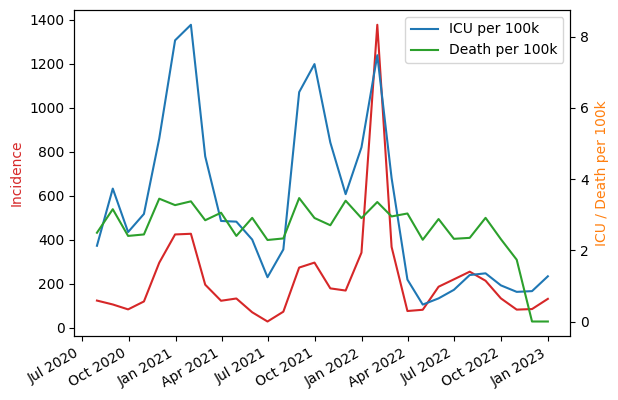

In [ ]:

# Create a figure and a set of subplots
fig, ax1 = plt.subplots()

# Create a line plot for the incidence on the first y-axis
ax1.plot(merged_hospitalizations_mort_inz_US["date"], merged_hospitalizations_mort_inz_US["inzidenz"], label='Incidence', color='tab:red')
ax1.set_ylabel('Incidence', color='tab:red')

# Create a twin y-axis for the cases per 100k
ax2 = ax1.twinx()
ax2.plot(merged_hospitalizations_mort_inz_US["date"], merged_hospitalizations_mort_inz_US["value_per_100000"], label='ICU per 100k', color='tab:blue')
ax2.set_ylabel('ICU / Death per 100k', color='tab:orange')
ax2.plot(merged_hospitalizations_mort_inz_US["date"], merged_hospitalizations_mort_inz_US["gestorben_pro_100000"], label='Death per 100k', color='tab:green')
# format the x-axis with dates
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))
fig.autofmt_xdate()

# Add a legend and x-axis label
plt.legend()
plt.xlabel('Date')
plt.show()



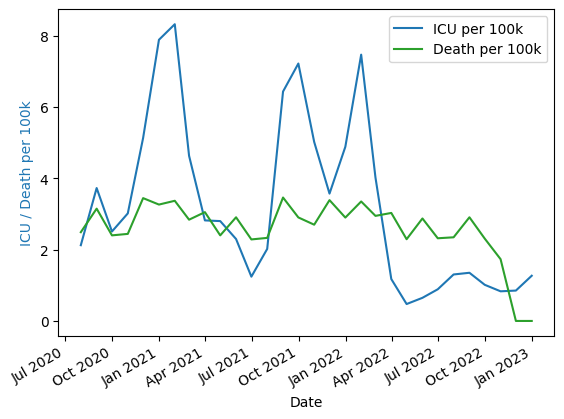

In [ ]:

# Create a figure and a set of subplots
fig, ax1 = plt.subplots()

# Create a line plot for the incidence on the first y-axis
ax1.plot(merged_hospitalizations_mort_inz_US["date"], merged_hospitalizations_mort_inz_US["value_per_100000"], label='ICU per 100k', color='tab:blue')
ax1.set_ylabel('ICU / Death per 100k', color='tab:blue')
ax1.plot(merged_hospitalizations_mort_inz_US["date"], merged_hospitalizations_mort_inz_US["gestorben_pro_100000"], label='Death per 100k', color='tab:green')

# format the x-axis with dates
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))
fig.autofmt_xdate()

# Add a legend and x-axis label
plt.legend()
plt.xlabel('Date')
plt.show()



#### Joinen USA ICU + Death/Inzidenz per 100k with Vaccination

In [246]:
type(vax_monat)

pandas.core.frame.DataFrame

In [257]:
df_vax_monat = vax_monat.reset_index()
df_vax_monat

,location,year,month,people_vaccinated,people_fully_vaccinated,total_boosters,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,total_boosters_per_hundred
0,Afghanistan,2021,2,8200.0,0.0,0.0,0.02,0.00,0.00
1,Afghanistan,2021,3,54000.0,0.0,0.0,0.13,0.00,0.00
2,Afghanistan,2021,4,360000.0,0.0,0.0,0.87,0.00,0.00
3,Afghanistan,2021,5,2834758.0,574841.0,0.0,6.90,1.41,0.00
4,Afghanistan,2021,6,3861941.0,1186390.0,0.0,9.39,2.88,0.00
...,...,...,...,...,...,...,...,...,...
5096,Zimbabwe,2022,6,156852808.0,114168942.0,21735350.0,961.09,699.54,133.20
5097,Zimbabwe,2022,7,165009462.0,121099327.0,24162841.0,1011.05,741.99,148.06
5098,Zimbabwe,2022,8,134218032.0,98854685.0,20451729.0,822.38,605.70,125.30
5099,Zimbabwe,2022,9,51400663.0,37909453.0,8173922.0,314.95,232.27,50.09


In [262]:
df_vax_monat.dtypes
df_vax_monat.columns
df_vax_monat.location.unique()

array(['Afghanistan', 'Africa', 'Albania', 'Algeria', 'Andorra', 'Angola',
       'Anguilla', 'Antigua and Barbuda', 'Argentina', 'Armenia', 'Aruba',
       'Asia', 'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain',
       'Bangladesh', 'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin',
       'Bermuda', 'Bhutan', 'Bolivia', 'Bonaire Sint Eustatius and Saba',
       'Bosnia and Herzegovina', 'Botswana', 'Brazil',
       'British Virgin Islands', 'Brunei', 'Bulgaria', 'Burkina Faso',
       'Burundi', 'Cambodia', 'Cameroon', 'Canada', 'Cape Verde',
       'Cayman Islands', 'Central African Republic', 'Chad', 'Chile',
       'China', 'Colombia', 'Comoros', 'Congo', 'Cook Islands',
       'Costa Rica', "Cote d'Ivoire", 'Croatia', 'Cuba', 'Curacao',
       'Cyprus', 'Czechia', 'Democratic Republic of Congo', 'Denmark',
       'Djibouti', 'Dominica', 'Dominican Republic', 'Ecuador', 'Egypt',
       'El Salvador', 'England', 'Equatorial Guinea', 'Estonia',
       'Eswatini', 'Ethi

In [263]:
df_vax_monat[df_vax_monat['location'] == 'United States']

,location,year,month,people_vaccinated,people_fully_vaccinated,total_boosters,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,total_boosters_per_hundred
4809,United States,2020,12,4.049782e+07,3.907840e+05,0.000000e+00,12.19,0.10,0.00
4810,United States,2021,1,5.105285e+08,9.008997e+07,0.000000e+00,153.77,27.15,0.00
4811,United States,2021,2,1.221966e+09,5.196522e+08,1.170000e+02,368.06,156.52,0.00
4812,United States,2021,3,2.559866e+09,1.451695e+09,5.480000e+02,771.02,437.26,0.00
4813,United States,2021,4,4.033929e+09,2.730397e+09,2.182000e+03,1214.99,822.36,0.00
4814,United States,2021,5,5.085862e+09,4.159831e+09,5.355000e+03,1531.85,1252.94,0.00
4815,United States,2021,6,5.372892e+09,4.712664e+09,7.357000e+03,1618.30,1419.43,0.00
4816,United States,2021,7,5.817387e+09,5.196156e+09,1.019500e+04,1752.18,1565.05,0.00
4817,United States,2021,8,6.211282e+09,5.444254e+09,1.483720e+07,1870.81,1639.80,4.45
4818,United States,2021,9,6.340802e+09,5.590080e+09,9.371397e+07,1909.83,1683.71,28.22


In [266]:
df_vax_monat_US = df_vax_monat[df_vax_monat.columns[[0,1,2,4]]][df_vax_monat['location'] == 'United States']
df_vax_monat_US

,location,year,month,people_fully_vaccinated
4809,United States,2020,12,3.907840e+05
4810,United States,2021,1,9.008997e+07
4811,United States,2021,2,5.196522e+08
4812,United States,2021,3,1.451695e+09
4813,United States,2021,4,2.730397e+09
4814,United States,2021,5,4.159831e+09
4815,United States,2021,6,4.712664e+09
4816,United States,2021,7,5.196156e+09
4817,United States,2021,8,5.444254e+09
4818,United States,2021,9,5.590080e+09


In [267]:
df_vax_monat_US['people_fully_vaccinated per 100k'] = df_vax_monat_US['people_fully_vaccinated'] / 100000
df_vax_monat_US

,location,year,month,people_fully_vaccinated,people_fully_vaccinated per 100k
4809,United States,2020,12,3.907840e+05,3.90784
4810,United States,2021,1,9.008997e+07,900.89971
4811,United States,2021,2,5.196522e+08,5196.52215
4812,United States,2021,3,1.451695e+09,14516.95254
4813,United States,2021,4,2.730397e+09,27303.97053
4814,United States,2021,5,4.159831e+09,41598.31308
4815,United States,2021,6,4.712664e+09,47126.64108
4816,United States,2021,7,5.196156e+09,51961.55573
4817,United States,2021,8,5.444254e+09,54442.54094
4818,United States,2021,9,5.590080e+09,55900.79706


In [268]:
merged_hospitalizations_mort_inz_vax_US = merged_hospitalizations_mort_inz_US.merge(df_vax_monat_US, on=['location', 'month', 'year'], how='inner')

In [272]:
merged_hospitalizations_mort_inz_vax_US.sort_values('date')

,month,year,location,value_per_100000,gestorben,date,inzidenz,gestorben_pro_100000,people_fully_vaccinated,people_fully_vaccinated per 100k
0,12,2020,United States,7.89346,326721.0,2020-12-31,423.531745,3.26721,3.907840e+05,3.90784
1,1,2021,United States,8.33015,337353.0,2021-01-31,426.595800,3.37353,9.008997e+07,900.89971
2,2,2021,United States,4.63588,284277.0,2021-02-28,195.041929,2.84277,5.196522e+08,5196.52215
3,3,2021,United States,2.82273,305436.0,2021-03-31,121.955429,3.05436,1.451695e+09,14516.95254
4,4,2021,United States,2.80339,240224.0,2021-04-30,132.247073,2.40224,2.730397e+09,27303.97053
5,5,2021,United States,2.30029,291024.0,2021-05-31,69.562635,2.91024,4.159831e+09,41598.31308
6,6,2021,United States,1.24340,228842.0,2021-06-30,27.587083,2.28842,4.712664e+09,47126.64108
7,7,2021,United States,2.02265,233169.0,2021-07-31,72.207858,2.33169,5.196156e+09,51961.55573
8,8,2021,United States,6.43975,346494.0,2021-08-31,272.925568,3.46494,5.444254e+09,54442.54094
9,9,2021,United States,7.22660,290577.0,2021-09-30,295.494687,2.90577,5.590080e+09,55900.79706


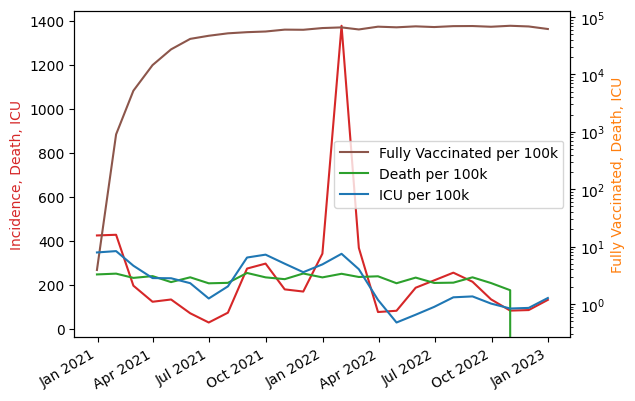

In [293]:

# Create a figure and a set of subplots
fig, ax1 = plt.subplots()

# Create a line plot for the incidence on the first y-axis
ax1.plot(merged_hospitalizations_mort_inz_vax_US["date"], merged_hospitalizations_mort_inz_vax_US["inzidenz"], label='Incidence', color='tab:red')
ax1.set_ylabel('Incidence, Death, ICU', color='tab:red')

# Create a twin y-axis for the cases per 100k
ax2 = ax1.twinx()
ax2.set_ylabel('Fully Vaccinated, Death, ICU', color='tab:orange')
ax2.plot(merged_hospitalizations_mort_inz_vax_US["date"], merged_hospitalizations_mort_inz_vax_US["people_fully_vaccinated per 100k"], label='Fully Vaccinated per 100k', color='tab:brown')
ax2.plot(merged_hospitalizations_mort_inz_vax_US["date"], merged_hospitalizations_mort_inz_vax_US["gestorben_pro_100000"], label='Death per 100k', color='tab:green')
ax2.plot(merged_hospitalizations_mort_inz_vax_US["date"], merged_hospitalizations_mort_inz_vax_US["value_per_100000"], label='ICU per 100k', color='tab:blue')
# format the x-axis with dates
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))
fig.autofmt_xdate()
# Scaling y-axis
plt.yscale('log')
# Add a legend and x-axis label
plt.legend()
plt.xlabel('Date')
plt.show()



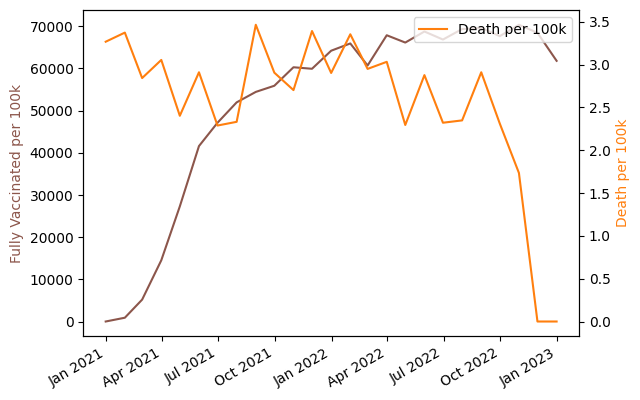

In [277]:
# Create a figure and a set of subplots
fig, ax1 = plt.subplots()

# Create a line plot for the incidence on the first y-axis
ax1.plot(merged_hospitalizations_mort_inz_vax_US["date"], merged_hospitalizations_mort_inz_vax_US["people_fully_vaccinated per 100k"], label='Fully Vaccinated per 100k', color='tab:brown')
ax1.set_ylabel('Fully Vaccinated per 100k', color='tab:brown')

# Create a twin y-axis for the cases per 100k
ax2 = ax1.twinx()
ax2.set_ylabel('Death per 100k', color='tab:orange')
ax2.plot(merged_hospitalizations_mort_inz_vax_US["date"], merged_hospitalizations_mort_inz_vax_US["gestorben_pro_100000"], label='Death per 100k', color='tab:orange')
# format the x-axis with dates
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))
fig.autofmt_xdate()

# Add a legend and x-axis label
plt.legend()
plt.xlabel('Date')
plt.show()


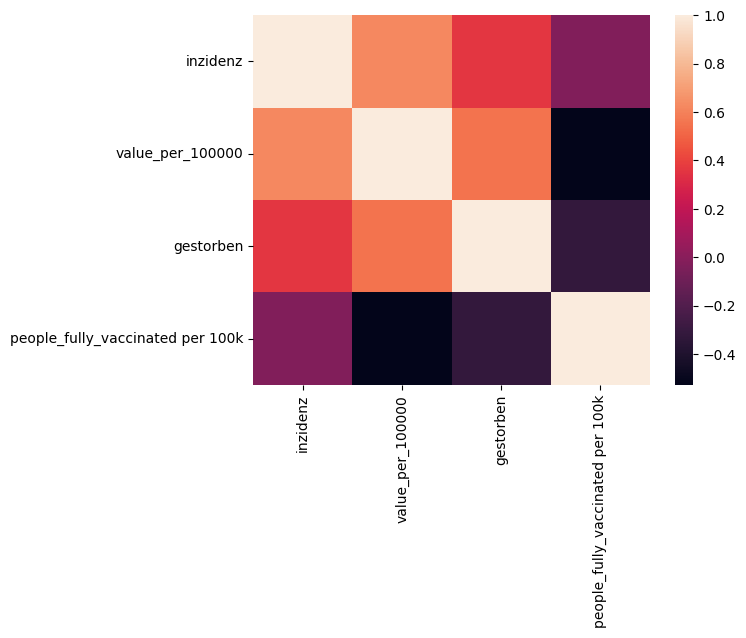

In [273]:
#test eda #using seaborn
corr = merged_hospitalizations_mort_inz_vax_US[['inzidenz','value_per_100000','gestorben','people_fully_vaccinated per 100k']].corr()
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns)
plt.show()

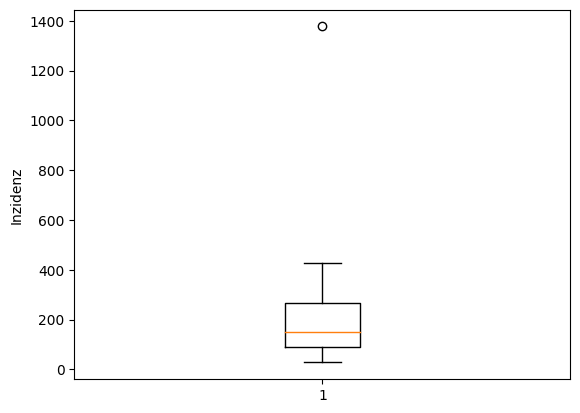

In [ ]:
#test eda
# Bar plot of year column
#merged_hospitalizations_mort_inz_US['year'].value_counts().plot(kind='bar')
#plt.xlabel('Year')
#plt.ylabel('Frequency')
#plt.show()

# Box plot of inzidenz column
plt.boxplot(merged_hospitalizations_mort_inz_US['inzidenz'])
plt.ylabel('Inzidenz')
plt.show()

In [276]:
#Standard Scaling
scaler = StandardScaler()
Standard_Scaler = scaler.fit_transform(merged_hospitalizations_mort_inz_US[['value_per_100000','gestorben','inzidenz']])

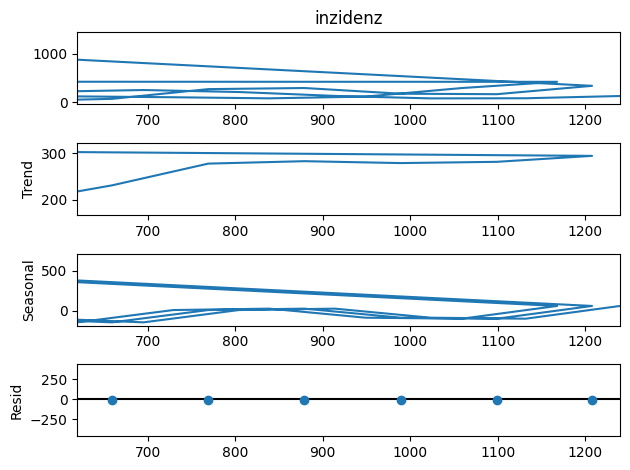

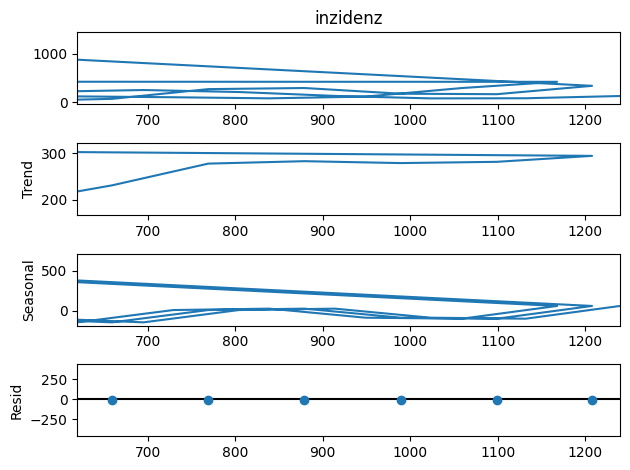

In [295]:
#test Time Series Analysis:

# Decompose time series data into trend, seasonal, and residual components
result = seasonal_decompose(merged_hospitalizations_mort_inz_US['inzidenz'], model='addicative', period=12)
result.plot()

In [ ]:
# Welche Länder sind nicht vorhanden
# Add to List
mort_inz_lcoation_list = mort_inz['location'].tolist()
result_hospitalizations_country_name_list = result_hospitalizations['location'].tolist()
# Create sets from the lists
set1 = set(mort_inz_lcoation_list)
set2 = set(result_hospitalizations_country_name_list)

# Find the difference between the sets
difference = set1.difference(set2)

print(difference)

{'England & Wales', 'Ecuador', 'Jamaica', 'Mongolia', 'Reunion', 'San Marino', 'Russia', 'Andorra', 'El Salvador', 'Costa Rica', 'Macao', 'Bosnia and Herzegovina', 'Liechtenstein', 'Hungary', 'Saint Kitts and Nevis', 'Tunisia', 'Iran', 'Qatar', 'Peru', 'Moldova', 'Uruguay', 'Kuwait', 'Lebanon', 'Hong Kong', 'Colombia', 'Bahamas', 'Suriname', 'Kyrgyzstan', 'Gibraltar', 'Ukraine', 'Albania', 'Paraguay', 'Maldives', 'Puerto Rico', 'French Polynesia', 'Cape Verde', 'Kazakhstan', 'Barbados', 'Mauritius', 'Belize', 'Transnistria', 'Philippines', 'Kosovo', 'Greece', 'Dominican Republic', 'Brazil', 'Cuba', 'Jordan', 'Palestine', 'Uzbekistan', 'New Zealand', 'Georgia', 'Azerbaijan', 'Croatia', 'Mayotte', 'Brunei', 'New Caledonia', 'Tajikistan', 'Guatemala', 'Thailand', 'Martinique', 'Taiwan', 'Saint Vincent and the Grenadines', 'Panama', 'Guadeloupe', 'Singapore', 'Nicaragua', 'Faeroe Islands', 'Montenegro', 'Poland', 'Seychelles', 'Armenia', 'Norway', 'Mexico', 'Belarus', 'Monaco', 'French Gui